In [2]:
import scipy.stats as stats
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Problem 2

In [2]:
poiss = stats.poisson(100)

In [3]:
1-poiss.cdf(125)

0.006797648984239624

In [4]:
def pdf(alpha, k):
    return (alpha**k)*(math.e**(-alpha))/(math.factorial(k))

In [5]:
prob1to125 = 0
for i in range(0,125):
    prob1to125 += pdf(100,i)
prob125toinf = 1-prob1to125
prob125toinf

0.008773598988667919

## Problem 3

In [6]:
myrice = stats.rice(0.5)

In [7]:
x = np.linspace(0, 5, 1000) # our x range

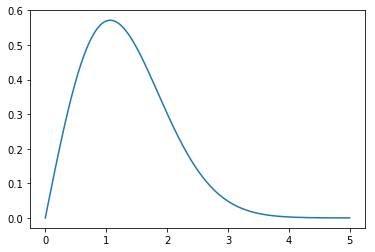

In [8]:
plt.plot(x,myrice.pdf(x))

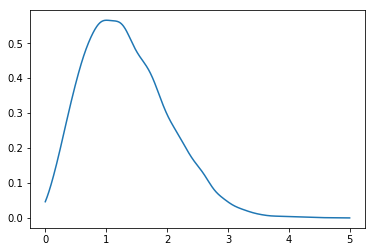

In [9]:
approx = stats.gaussian_kde(myrice.rvs(5000))
plt.plot(x, approx(x), label="Gaussian kernel density estimation")

Total Error on the estimator:  0.09050953991485011
We needed 463 points to observe this amount of error.


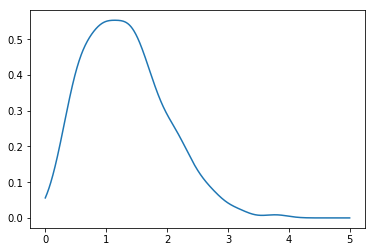

In [3]:
myrice = stats.rice(0.5)
x = np.linspace(0, 5, 1000) # our x range
for sz in range (100,10000):
    approx = stats.gaussian_kde(myrice.rvs(sz))
    total_error = np.sum((approx(x)-myrice.pdf(x))**2)
    if (total_error <= 0.1):
        print("Total Error on the estimator: ",total_error)
        print("We needed",sz,"points to observe this amount of error.")
        break
plt.plot(x, approx(x), label="Gaussian kernel density estimation");

## Problem 4

In [11]:
GG = [[18,13,12,15],[24,6,6,6]]

In [12]:
expected = stats.contingency.expected_freq(GG)
print("(b) Expected values:")
print(expected)

(b) Expected values:
[[24.36 11.02 10.44 12.18]
 [17.64  7.98  7.56  8.82]]


In [13]:
errors = GG-expected
print("(c) Errors:")
print(errors)

(c) Errors:
[[-6.36  1.98  1.56  2.82]
 [ 6.36 -1.98 -1.56 -2.82]]


In [14]:
Cvals = (errors)**2/expected;

In [15]:
stats.chi2.sf(Cvals,df=3);

In [17]:
C,p,dof,exp = stats.chi2_contingency(GG,correction=False)
print("(d) Chi squared test statistic:", C)
print("(e) Degrees of freedom:", dof)
print("(f) P value:", p)

(d) Chi squared test statistic: 6.910132474042249
(e) Degrees of freedom: 3
(f) P value: 0.07481799078534634


No, this data is not sufficient to conclude that GG5 offers a difference in performance compared to GG4 at the p < 0.05 significance level. Observed p is approximately 0.075.